In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.optimize import curve_fit
import lmfit
from scipy.signal import find_peaks

# Dampfdruck

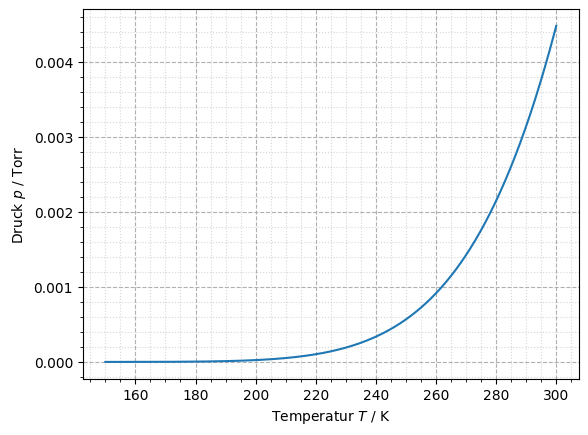

In [10]:
def dampfdruck(T):
    return np.exp(10.55-3333/T -0.85*np.log(T))
x = np.linspace(150,300,1000)

plt.plot(x,dampfdruck(x))
#plt.yscale("log")
plt.xlabel(r"Temperatur $T$ / K")
plt.ylabel(r"Druck $p$ / Torr")
plt.grid(visible=True, which="major", linestyle="--")
plt.minorticks_on()
plt.grid(visible=True, which="minor", linestyle=":", alpha=0.5)
plt.show()

# Anodenstromkurven

## Data

In [14]:
# Werte für 165°C
u2 = np.loadtxt("../data/franck_hertz/001_165C_2VU2_30VU1.txt", skiprows=1)
u25 = np.loadtxt("../data/franck_hertz/002_165C_2_5VU2_30VU1.txt", skiprows=1)
u3 = np.loadtxt("../data/franck_hertz/003_165C_3VU2_30VU1.txt", skiprows=1)
u35 = np.loadtxt("../data/franck_hertz/004_165C_3_5VU2_30VU1.txt", skiprows=1)

all_u = [u2, u25, u3, u35]

u2b = np.array(u2[:,0])
u2a = np.array(u2[:,1])
u25b = np.array(u25[:,0])
u25a = np.array(u25[:,1])
u3b = np.array(u3[:,0])
u3a = np.array(u3[:,1])
u35b = np.array(u35[:,0])
u35a = np.array(u35[:,1])

all_u_b = [u2b, u25b, u3b, u35b]
all_u_a = [u2a, u25a, u3a, u35a]

# Werte für U=2V
T165 = np.loadtxt("../data/franck_hertz/001_165C_2VU2_30VU1.txt", skiprows=1)
T170 = np.loadtxt("../data/franck_hertz/006_170C_2VU2_30VU1.txt", skiprows=1)
T175 = np.loadtxt("../data/franck_hertz/007_175C_2VU2_30VU1.txt", skiprows=1)
T180 = np.loadtxt("../data/franck_hertz/008_180C_2VU2_30VU1.txt", skiprows=1)

all_T = [T165, T170, T175, T180]

T165b = np.array(T165[:,0])
T165a = np.array(T165[:,1])
T170b = np.array(T170[:,0])
T170a = np.array(T170[:,1])
T175b = np.array(T175[:,0])
T175a = np.array(T175[:,1])
T180b = np.array(T180[:,0])
T180a = np.array(T180[:,1])

all_T_b = [T165b, T170b, T175b, T180b]
all_T_a = [T165a, T170a, T175a, T180a]

dT = 5 # in °C
u_names = ["2V", "2,5V", "3V", "3,5V"]
T_names = ["165°C", "170°C", "175°C", "180°C"]


## Plots

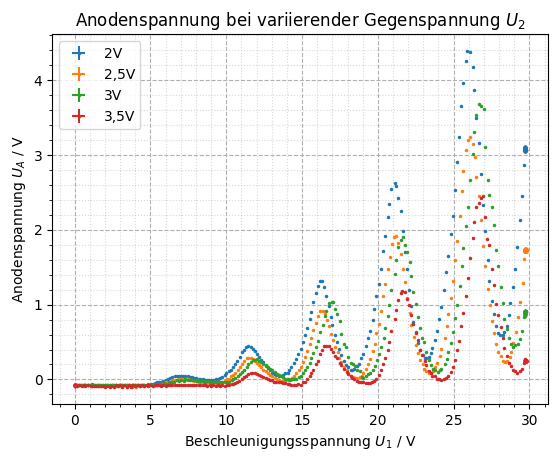

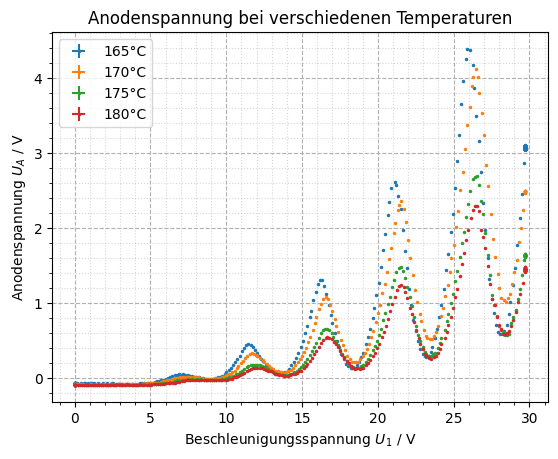

In [18]:
# Plots
colors = np.array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
def plot(ub, ua, names, x_err, y_err, bool):
    fig, ax = plt.subplots()
    for i in range(len(ua)):
        plt.errorbar(ub[i], ua[i], xerr=x_err, yerr=y_err, fmt='.', markersize=3, label=names[i], color=colors[i])

    plt.grid(visible=True, which="major", linestyle="--")
    plt.minorticks_on()
    plt.grid(visible=True, which="minor", linestyle=":", alpha=0.5)
    plt.legend()
    plt.xlabel(r"Beschleunigungsspannung $U_1$ / V")
    plt.ylabel(r"Anodenspannung $U_A$ / V")
    if bool == True:
        plt.title(r"Anodenspannung bei variierender Gegenspannung $U_2$")
        #plt.savefig("../figures/franck_hertz_heizung.pdf")
    else:
        plt.title(r"Anodenspannung bei verschiedenen Temperaturen")
        #plt.savefig("../figures/franck_hertz_temp.pdf")
    plt.show()

plot(all_u_b, all_u_a, u_names, 0, 0, True)
plot(all_T_b, all_T_a, T_names, 0, 0, False)

## Fits

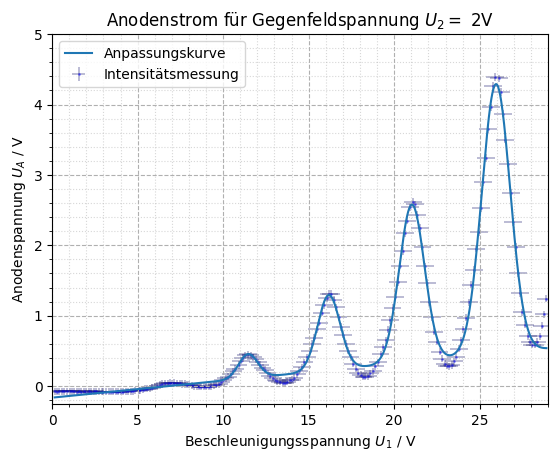

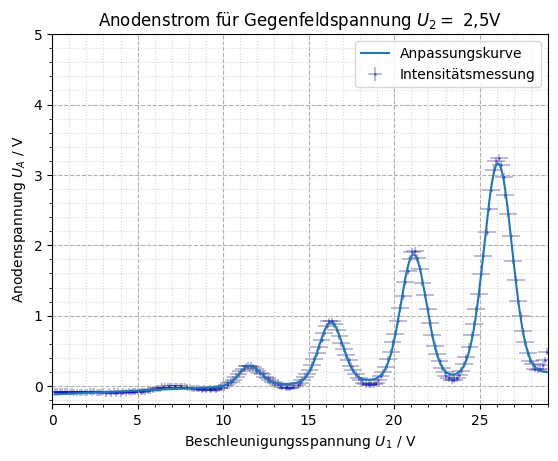

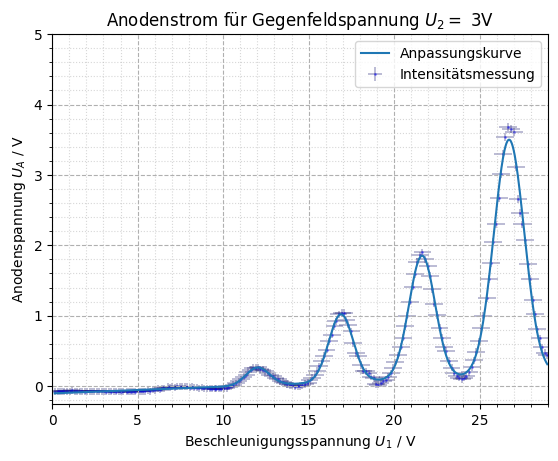

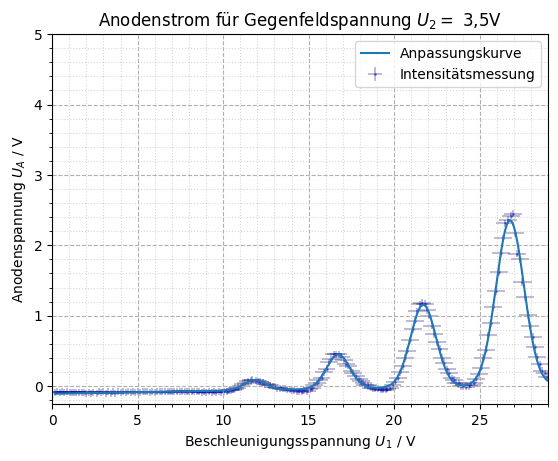

lin_aU = array([[0.02409678],
       [0.01076707],
       [0.00949548],
       [0.00425529]])
dlin_aU = array([[0.0012268 ],
       [0.00053931],
       [0.00084423],
       [0.00043971]])
lin_bU = array([[-0.16379604],
       [-0.1185484 ],
       [-0.10322343],
       [-0.10792331]])
dlin_bU = array([[0.01500178],
       [0.00655044],
       [0.00892098],
       [0.00500809]])
ampU = array([[0.48557659, 1.75984362, 4.11577135, 7.92638139],
       [0.45467942, 1.47612614, 3.29536589, 6.11200993],
       [0.43659236, 1.71832065, 3.35144421, 7.44544576],
       [0.23220522, 0.83376093, 2.18260035, 4.77444376]])
dampU = array([[0.06938732, 0.08131638, 0.09908079, 0.12636862],
       [0.03283331, 0.03663299, 0.04416605, 0.05486551],
       [0.04578678, 0.0532162 , 0.06561857, 0.08887147],
       [0.0246784 , 0.02814248, 0.03474119, 0.04390253]])
peaksU = array([[11.45911454, 16.17537775, 21.03141676, 25.95123862],
       [11.55074871, 16.29520353, 21.13253623, 26.06604692],
       [12.012

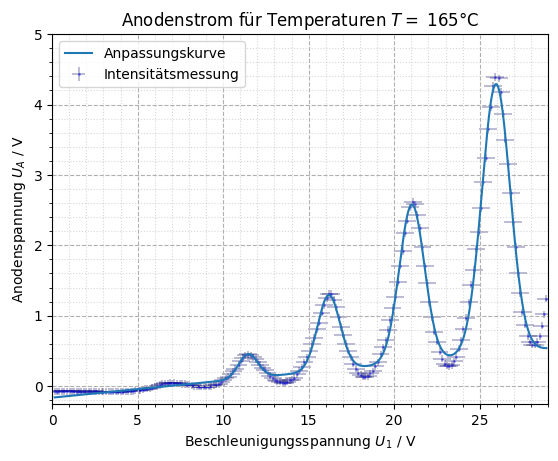

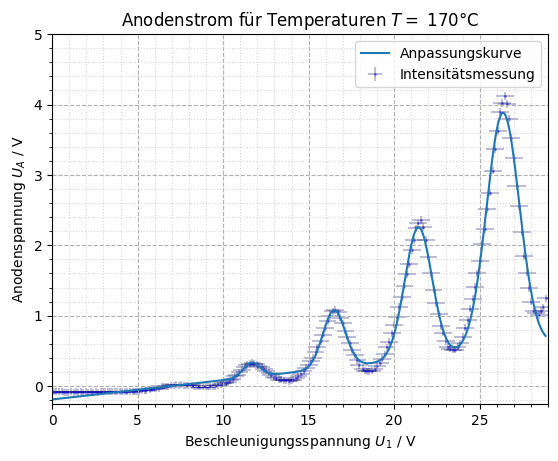

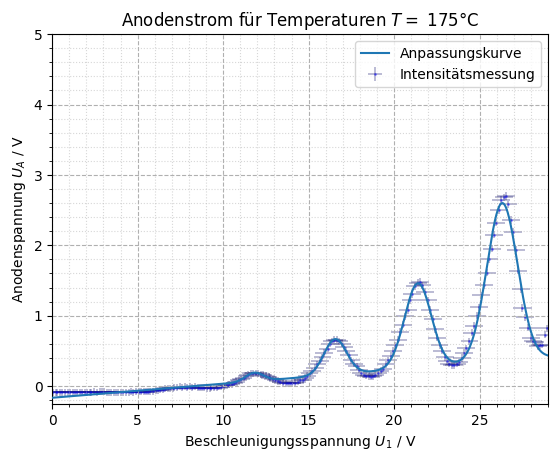

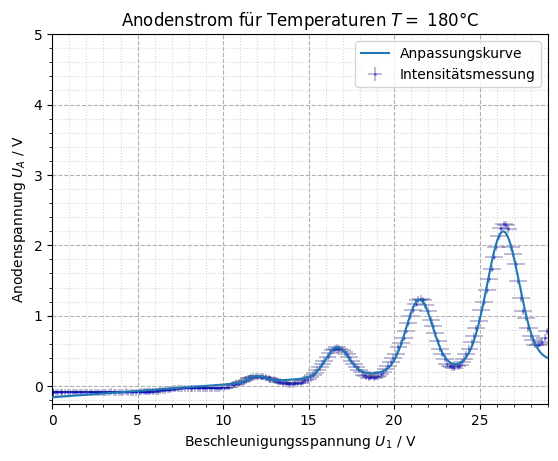

In [53]:
deg = 4
u_min = 0
u_max = 29

fit_res = []

#print(model.components)



lin_a = np.zeros((4, 1))
lin_b = np.zeros((4, 1))
dlin_a = np.zeros((4, 1))
dlin_b = np.zeros((4, 1))
amp = np.zeros((4, 4))
damp = np.zeros((4, 4))
peaks = np.zeros((4, 4))
dpeaks = np.zeros((4, 4))
sigmafit = np.zeros((4, 4))
dsigmafit = np.zeros((4, 4))
redchi = np.zeros((4, 1))

Tlin_a = np.zeros((4, 1))
Tlin_b = np.zeros((4, 1))
Tdlin_a = np.zeros((4, 1))
Tdlin_b = np.zeros((4, 1))
Tamp = np.zeros((4, 4))
Tdamp = np.zeros((4, 4))
Tpeaks = np.zeros((4, 4))
Tdpeaks = np.zeros((4, 4))
Tsigmafit = np.zeros((4, 4))
Tdsigmafit = np.zeros((4, 4))
Tredchi = np.zeros((4, 1))

####
####
####

from scipy.signal import find_peaks
from lmfit.models import LinearModel, GaussianModel

def bla(i, blub, boolean):
    '''
    i = Index für ne for-schleife
    blub = Array, indem Datensätze drin sind und über die indiziert werden kann (alleU oder alleT)
    boolean = True für U2 und False für T
    '''

    plt.close()
    data_new = blub[i-1]

    # Daten zuschneiden
    data_cut = data_new[np.logical_and(data_new[:,0] > u_min, data_new[:,0] < u_max)]
    U = data_cut[:,0]   # Beschleunigungsspannung
    I = data_cut[:,1]   # Anodenstrom/-spannung

    # Fehler (wie gehabt)
    dI = 0.001 * I + 0.005*10
    dU = 0.001 * U + 0.005*100

    # --- Peaks automatisch finden (wie in deinem funktionierenden Code) ---
    peaks_idx, props = find_peaks(
        I,
        height=0.0,
        distance=20,
        prominence=0.02*np.ptp(I)
    )

    if len(peaks_idx) == 0:
        raise RuntimeError(f"Keine Peaks in Datensatz {i} gefunden – passe find_peaks-Parameter an.")

    peak_centers = U[peaks_idx]
    peak_amps    = props['peak_heights']

    # sicherstellen, dass wir genau 'deg' Peaks benutzen
    # -> stärkste 'deg' Peaks nach Amplitude wählen
    sort_idx = np.argsort(peak_amps)[::-1]           # nach Höhe absteigend
    sort_idx = sort_idx[:deg]                        # nur die größten deg
    peak_centers = peak_centers[sort_idx]
    peak_amps    = peak_amps[sort_idx]

    # der Übersicht halber noch nach Zentrum sortieren (steigende U)
    order = np.argsort(peak_centers)
    peak_centers = peak_centers[order]
    peak_amps    = peak_amps[order]

    # --- Modell: Linearer Untergrund + 4 Gauss ---
    model = LinearModel(prefix='const')
    for j in range(deg):
        model += GaussianModel(prefix=f"gauss{j}")

    params = model.make_params()

    # Startwerte für den linearen Untergrund
    params["constintercept"].set(value=np.median(I))
    params["constslope"].set(value=0.0)

    # Startwerte für die Gauss-Peaks
    for j in range(deg):
        cen = peak_centers[j]
        amp_j = peak_amps[j]

        params[f"gauss{j}center"].set(value=cen, min=cen-0.5, max=cen+0.5)
        params[f"gauss{j}amplitude"].set(value=amp_j, min=0)
        params[f"gauss{j}sigma"].set(value=0.3, min=0.05, max=1.0)

    # Gewichte wie in deinem "funktionierenden" Code: 1 / Fehler
    weights = 1.0 / dI

    result = model.fit(data=I, x=U, weights=weights, params=params)

    fig, ax = plt.subplots(num=2)

        # print(result.fit_report())
    bleb = result.summary()

    # Daten aus den Gauß Fits
    if boolean == True:
        lin_a[i-1]  = [result.params["constslope"].value]
        dlin_a[i-1] = [result.params["constslope"].stderr]
        lin_b[i-1]  = [result.params["constintercept"].value]
        dlin_b[i-1] = [result.params["constintercept"].stderr]

        amp[i-1] = [
            result.params["gauss0amplitude"].value,
            result.params["gauss1amplitude"].value,
            result.params["gauss2amplitude"].value,
            result.params["gauss3amplitude"].value,
        ]
        damp[i-1] = [
            result.params["gauss0amplitude"].stderr,
            result.params["gauss1amplitude"].stderr,
            result.params["gauss2amplitude"].stderr,
            result.params["gauss3amplitude"].stderr,
        ]

        peaks[i-1] = [
            result.params["gauss0center"].value,
            result.params["gauss1center"].value,
            result.params["gauss2center"].value,
            result.params["gauss3center"].value,
        ]
        dpeaks[i-1] = [
            result.params["gauss0center"].stderr,
            result.params["gauss1center"].stderr,
            result.params["gauss2center"].stderr,
            result.params["gauss3center"].stderr,
        ]

        sigmafit[i-1] = [
            result.params["gauss0sigma"].value,
            result.params["gauss1sigma"].value,
            result.params["gauss2sigma"].value,
            result.params["gauss3sigma"].value,
        ]
        dsigmafit[i-1] = [
            result.params["gauss0sigma"].stderr,
            result.params["gauss1sigma"].stderr,
            result.params["gauss2sigma"].stderr,
            result.params["gauss3sigma"].stderr,
        ]
        redchi[i-1] = [result.redchi]   # direkt aus result
    else:
        # gleiche Struktur für T-Arrays
        Tlin_a[i-1]  = [result.params["constslope"].value]
        Tdlin_a[i-1] = [result.params["constslope"].stderr]
        Tlin_b[i-1]  = [result.params["constintercept"].value]
        Tdlin_b[i-1] = [result.params["constintercept"].stderr]

        Tamp[i-1] = [
            result.params["gauss0amplitude"].value,
            result.params["gauss1amplitude"].value,
            result.params["gauss2amplitude"].value,
            result.params["gauss3amplitude"].value,
        ]
        Tdamp[i-1] = [
            result.params["gauss0amplitude"].stderr,
            result.params["gauss1amplitude"].stderr,
            result.params["gauss2amplitude"].stderr,
            result.params["gauss3amplitude"].stderr,
        ]

        Tpeaks[i-1] = [
            result.params["gauss0center"].value,
            result.params["gauss1center"].value,
            result.params["gauss2center"].value,
            result.params["gauss3center"].value,
        ]
        Tdpeaks[i-1] = [
            result.params["gauss0center"].stderr,
            result.params["gauss1center"].stderr,
            result.params["gauss2center"].stderr,
            result.params["gauss3center"].stderr,
        ]

        Tsigmafit[i-1] = [
            result.params["gauss0sigma"].value,
            result.params["gauss1sigma"].value,
            result.params["gauss2sigma"].value,
            result.params["gauss3sigma"].value,
        ]
        Tdsigmafit[i-1] = [
            result.params["gauss0sigma"].stderr,
            result.params["gauss1sigma"].stderr,
            result.params["gauss2sigma"].stderr,
            result.params["gauss3sigma"].stderr,
        ]
        Tredchi[i-1] = [result.redchi]

    x_fit = np.linspace(U.min(), U.max(), 1000)
    plt.errorbar(U, I, xerr=dU, yerr=dI,
                 fmt='.', color='blue', label='Intensitätsmessung',
                 markersize=2.2, ecolor='midnightblue', capsize=0,
                 elinewidth=1.2, alpha=0.35, zorder=1)
    plt.plot(x_fit, result.eval(params=result.params, x=x_fit),
             zorder=10, label="Anpassungskurve")

    # Dein Stil
    plt.grid(visible=True, which='major', linestyle='--')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', linestyle=':', alpha=0.5)
    plt.legend(prop={'size': 10}, loc='best')
    #ax.set_facecolor('gainsboro')
    plt.ylim(-0.25, 5)
    plt.xlabel(r'Beschleunigungsspannung $U_1$ / V')
    plt.ylabel(r'Anodenspannung $U_A$ / V')
    plt.xlim(u_min, u_max)
    if boolean:
        plt.title(fr'Anodenstrom für Gegenfeldspannung $U_2 =$ {u_names[i-1]}')
    else:
        plt.title(fr'Anodenstrom für Temperaturen $T =$ {T_names[i-1]}')

    fit_res.append(result)
    plt.show()
    print('===============================================================================================================================')


for i in range(1, 5):
    bla(i, all_u, True)
lin_aU = lin_a
dlin_aU = dlin_a
lin_bU = lin_b
dlin_bU = dlin_b
ampU = amp
dampU = damp
peaksU = peaks
dpeaksU = dpeaks
sigmafitU = sigmafit
dsigmafitU = dsigmafit
redchiU = redchi

# bla(1, alleU, True)

print(f'{lin_aU = }')
print(f'{dlin_aU = }')
print(f'{lin_bU = }')
print(f'{dlin_bU = }')
print(f'{ampU = }')
print(f'{dampU = }')
print(f'{peaksU = }')
print(f'{dpeaksU = }')
print(f'{sigmafitU = }')
print(f'{dsigmafitU = }')
print(f'{redchiU = }')

print('-----------------------------------------------------------------------------------')
for i in range(1, 5):
    bla(i, all_T, False)
lin_aT = Tlin_a
dlin_aT = Tdlin_a
lin_bT = Tlin_b
dlin_bT = Tdlin_b
ampT = Tamp
dampT = Tdamp
peaksT = Tpeaks
dpeaksT = Tdpeaks
sigmafitT = Tsigmafit
dsigmafitT = Tdsigmafit
redchiT = Tredchi

# print(f'{lin_aT = }')
# print(f'{dlin_aT = }')
# print(f'{lin_bT = }')
# print(f'{dlin_bT = }')
# print(f'{ampU = }')
# print(f'{dampU = }')
# print(f'{peaksT = }')
# print(f'{dpeaksT = }')
# print(f'{sigmafitT = }')
# print(f'{dsigmafitT = }')
# print(f'{redchiT = }')

## Werte

In [54]:
def latextab(data, label):
    # data: dictionary mit werten
    # label: string für entweder columns oder index
    data_tex = pd.DataFrame.from_dict(data, orient = str(label))
    data_tex = data_tex.to_latex(index=False)
    print(data_tex)

def merge(data1, data2):
    arr = []
    for i in range(len(data1)):
        arr = np.concatenate((arr, data1[i]))
    for j in range(len(data2)):
        arr = np.concatenate((arr, data2[j]))
    return np.array(arr)

new_chi2red = merge(redchiU, redchiT)
new_a = merge(lin_aU, lin_aT)
new_da = merge(dlin_aU, dlin_aT)
new_b = merge(lin_bU, lin_bT)
new_db = merge(dlin_bU, dlin_bT)

new_amp = {}
new_damp = {}
new_peaks = {}
new_dpeaks = {}
new_sigma = {}
new_dsigma = {}

for i in range(0,4):
    new_amp['amp_'+str(i)] = np.array([ampU[:,i], ampT[:,i]])
    new_damp['damp_'+str(i)] = np.array([dampU[:,i], dampT[:,i]])
    new_peaks['mu_'+str(i)] = np.array([peaksU[:,i], peaksT[:,i]])
    new_dpeaks['dmu_'+str(i)] = np.array([dpeaksU[:,i], dpeaksT[:,i]])
    new_sigma['sigma_'+str(i)] = np.array([sigmafitU[:,i], sigmafitT[:,i]])
    new_dsigma['dsigma_'+str(i)] = np.array([dsigmafitU[:,i], dsigmafitT[:,i]])

# index 0 = U, index 1 = T
amp0 = np.concatenate([new_amp['amp_0'][0], new_amp['amp_0'][1]])
amp1 = np.concatenate([new_amp['amp_1'][0], new_amp['amp_1'][1]])
amp2 = np.concatenate([new_amp['amp_2'][0], new_amp['amp_2'][1]])
amp3 = np.concatenate([new_amp['amp_3'][0], new_amp['amp_3'][1]])

damp0 = np.concatenate([new_damp['damp_0'][0], new_damp['damp_0'][1]])
damp1 = np.concatenate([new_damp['damp_1'][0], new_damp['damp_1'][1]])
damp2 = np.concatenate([new_damp['damp_2'][0], new_damp['damp_2'][1]])
damp3 = np.concatenate([new_damp['damp_3'][0], new_damp['damp_3'][1]])

mu0 = np.concatenate([new_peaks['mu_0'][0], new_peaks['mu_0'][1]])
mu1 = np.concatenate([new_peaks['mu_1'][0], new_peaks['mu_1'][1]])
mu2 = np.concatenate([new_peaks['mu_2'][0], new_peaks['mu_2'][1]])
mu3 = np.concatenate([new_peaks['mu_3'][0], new_peaks['mu_3'][1]])

dmu0 = np.concatenate([new_dpeaks['dmu_0'][0], new_dpeaks['dmu_0'][1]])
dmu1 = np.concatenate([new_dpeaks['dmu_1'][0], new_dpeaks['dmu_1'][1]])
dmu2 = np.concatenate([new_dpeaks['dmu_2'][0], new_dpeaks['dmu_2'][1]])
dmu3 = np.concatenate([new_dpeaks['dmu_3'][0], new_dpeaks['dmu_3'][1]])

sigma0 = np.concatenate([new_sigma['sigma_0'][0], new_sigma['sigma_0'][1]])
sigma1 = np.concatenate([new_sigma['sigma_1'][0], new_sigma['sigma_1'][1]])
sigma2 = np.concatenate([new_sigma['sigma_2'][0], new_sigma['sigma_2'][1]])
sigma3 = np.concatenate([new_sigma['sigma_3'][0], new_sigma['sigma_3'][1]])

dsigma0 = np.concatenate([new_dsigma['dsigma_0'][0], new_dsigma['dsigma_0'][1]])
dsigma1 = np.concatenate([new_dsigma['dsigma_1'][0], new_dsigma['dsigma_1'][1]])
dsigma2 = np.concatenate([new_dsigma['dsigma_2'][0], new_dsigma['dsigma_2'][1]])
dsigma3 = np.concatenate([new_dsigma['dsigma_3'][0], new_dsigma['dsigma_3'][1]])

# dictionary of data
fits_fh = {
    "chi2red" : new_chi2red,
    "a" : new_a,
    "da" : new_da,
    "b" : new_b,
    "db" : new_db,
    "amp0" : amp0,
    "damp0" : damp0,
    "mu0" : mu0,
    "dmu0" : dmu0,
    "sigma0" : sigma0,
    "dsigma0" : dsigma0,
    "amp1" : amp1,
    "damp1" : damp1,
    "mu1" : mu1,
    "dmu1" : dmu1,
    "sigma1" : sigma1,
    "dsigma1" : dsigma1,
    "amp2" : amp2,
    "damp2" : damp2,
    "mu2" : mu2,
    "dmu2" : dmu2,
    "sigma2" : sigma2,
    "dsigma2" : dsigma2,
    "amp3" : amp3,
    "damp3" : damp3,
    "mu3" : mu3,
    "dmu3" : dmu3,
    "sigma3" : sigma3,
    "dsigma3" : dsigma3
}

latextab(fits_fh, "index")
    

\begin{tabular}{rrrrrrrr}
\toprule
0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
\midrule
3.617086 & 0.684650 & 1.152437 & 0.380239 & 3.617086 & 3.041000 & 1.505156 & 1.132324 \\
0.024097 & 0.010767 & 0.009495 & 0.004255 & 0.024097 & 0.027316 & 0.019851 & 0.017981 \\
0.001227 & 0.000539 & 0.000844 & 0.000440 & 0.001227 & 0.001404 & 0.000900 & 0.000803 \\
-0.163796 & -0.118548 & -0.103223 & -0.107923 & -0.163796 & -0.189358 & -0.165158 & -0.158776 \\
0.015002 & 0.006550 & 0.008921 & 0.005008 & 0.015002 & 0.014575 & 0.009884 & 0.008375 \\
0.485577 & 0.454679 & 0.436592 & 0.232205 & 0.485577 & 0.259868 & 0.159043 & 0.107449 \\
0.069387 & 0.032833 & 0.045787 & 0.024678 & 0.069387 & 0.061001 & 0.042958 & 0.036201 \\
11.459115 & 11.550749 & 12.012169 & 11.842445 & 11.459115 & 11.668656 & 11.821526 & 11.960445 \\
0.084052 & 0.047401 & 0.071112 & 0.069843 & 0.084052 & 0.123323 & 0.145714 & 0.169481 \\
0.564748 & 0.639439 & 0.685623 & 0.646854 & 0.564748 & 0.504397 & 0.520542 & 0.487401 \\
0.087877 & 0.0493

## Energiedifferenzen

In [58]:
# Mittelwert
def mittel(x,n):
    return (1/n)*np.sum(x)

# varianzgewichteter Mittelwert
def mittel_var(z,sigma):
    return np.sum(z/(sigma**2))/np.sum(1/(sigma**2))

# varianzgemittelte Standardabweichung
def sigma2(n,sigma):
    return n/(np.sum(1/sigma**2))

all_mu = [mu0, mu1, mu2, mu3]
all_dmu = [dmu0, dmu1, dmu2, dmu3]

def ediff(data, data_err):
    mit_e = []
    mit_de = []
    for j in range(len(data[0])):
        e = []
        de = []
        for i in range(len(data)-1):
            ediff = data[i+1][j] - data[i][j]
            ediff_err = np.sqrt(data_err[i+1][j]**2 + data_err[i][j]**2)
            e.append(ediff)
            de.append(ediff_err)
            print(f'Peak{i} bis Peak{i+1},', f'Plot {j}: ', f'{ediff}', '\\pm', f'{ediff_err}')
        print('-----------------------------------')
        e_bar = mittel(e, len(e))
        de_bar = mittel(de, len(de))
        mit_e.append(e_bar)
        mit_de.append(de_bar)
        print(f'Gemittelte \\Delta E Plot {j}: ', f'{e_bar}', '\\pm', f'{de_bar}')
        print('-----------------------------------')
    mittel_e = mittel(mit_e, len(mit_e))
    mittel_de = mittel(mit_de, len(mit_de))
    print('Gesamt gemittelt \\Delta E Plot: ', f'{mittel_e}', '\\pm', f'{mittel_de}')

ediff(all_mu, all_dmu)

Peak0 bis Peak1, Plot 0:  4.716263208338111 \pm 0.08909017143071299
Peak1 bis Peak2, Plot 0:  4.856039010924334 \pm 0.03317659414576712
Peak2 bis Peak3, Plot 0:  4.919821859507007 \pm 0.01786929208838248
-----------------------------------
Gemittelte \Delta E Plot 0:  4.830708026256484 \pm 0.04671201922162086
-----------------------------------
Peak0 bis Peak1, Plot 1:  4.744454826125523 \pm 0.050132649509878925
Peak1 bis Peak2, Plot 1:  4.837332700288599 \pm 0.018364806157981625
Peak2 bis Peak3, Plot 1:  4.933510687159082 \pm 0.009901402928599147
-----------------------------------
Gemittelte \Delta E Plot 1:  4.838432737857734 \pm 0.026132952865486565
-----------------------------------
Peak0 bis Peak1, Plot 2:  4.873119024309053 \pm 0.07365397547640681
Peak1 bis Peak2, Plot 2:  4.741085138236841 \pm 0.022083318151939823
Peak2 bis Peak3, Plot 2:  5.08781157012832 \pm 0.012614121768180959
-----------------------------------
Gemittelte \Delta E Plot 2:  4.900671910891404 \pm 0.03611713